# **Projet 7 :** Implémentez un modèle de scoring

## Notebook de prétraitement et exploration

### Import

In [1]:
%pylab inline
import pandas as pd
import missingno as msno
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


### Configuration

In [2]:
%load_ext autoreload
%autoreload 2

# configurations pandas
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)

### Chargement des données

In [3]:
from src.dataapp import App

app = App()
app.load()
_ = app.aggregate_by_id()

Loading ./data/tables/application_train.csv
./data/tables/application_train.csv loaded (307511, 122)
Loading ./data/tables/application_test.csv
./data/tables/application_test.csv loaded (48744, 121)
Loading ./data/tables/bureau_balance.csv
./data/tables/bureau_balance.csv loaded (27299925, 3)
Loading ./data/tables/bureau.csv
./data/tables/bureau.csv loaded (1716428, 17)
Loading ./data/tables/credit_card_balance.csv
./data/tables/credit_card_balance.csv loaded (3840312, 23)
Loading ./data/tables/installments_payments.csv
./data/tables/installments_payments.csv loaded (13605401, 8)
Loading ./data/tables/POS_CASH_balance.csv
./data/tables/POS_CASH_balance.csv loaded (10001358, 8)
Loading ./data/tables/previous_application.csv
./data/tables/previous_application.csv loaded (1670214, 37)
Aggregate by ID application
Shape après aggregation : (356255, 247)
Aggregate by ID bureau
Aggregate by ID bureau_balance
Shape après aggregation : (356255, 359)
Aggregate by ID previous_application
Shape ap

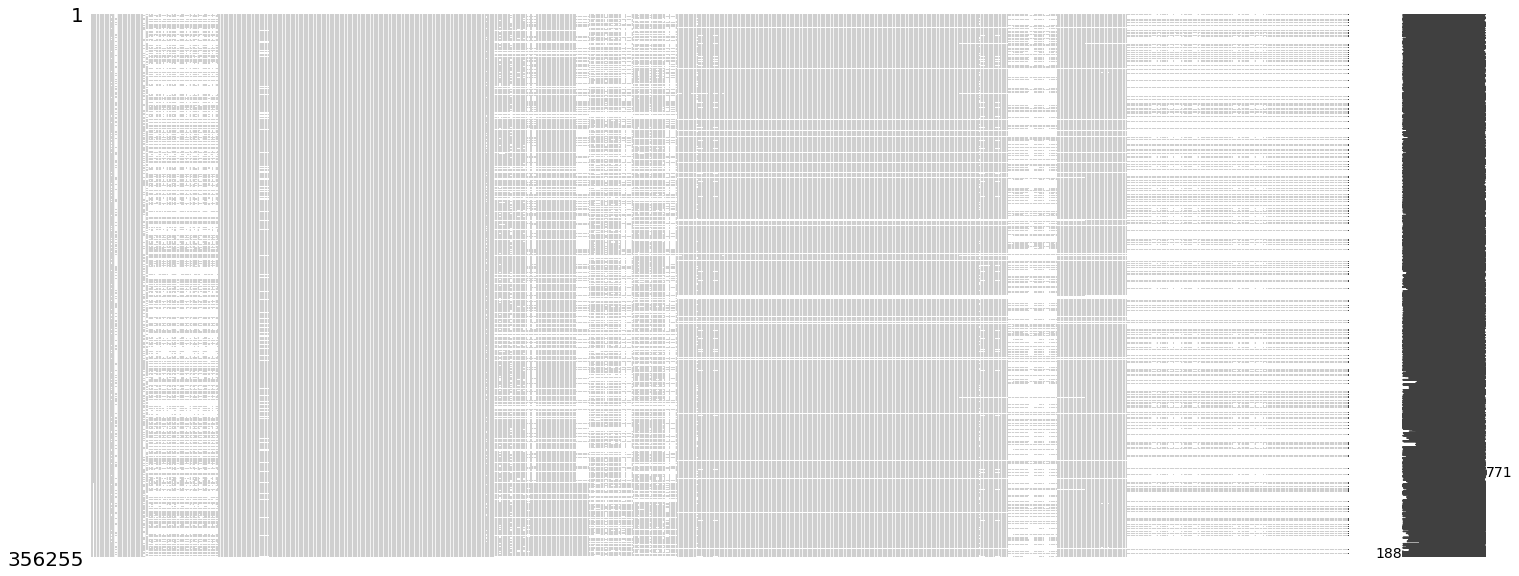

In [4]:
ax = msno.matrix(app.df)

In [5]:
print('Positive: {}'.format(app.df[app.df['TARGET'] == 1].shape))
print('Negative: {}'.format(app.df[app.df['TARGET'] == 0].shape))

Positive: (24825, 771)
Negative: (282686, 771)


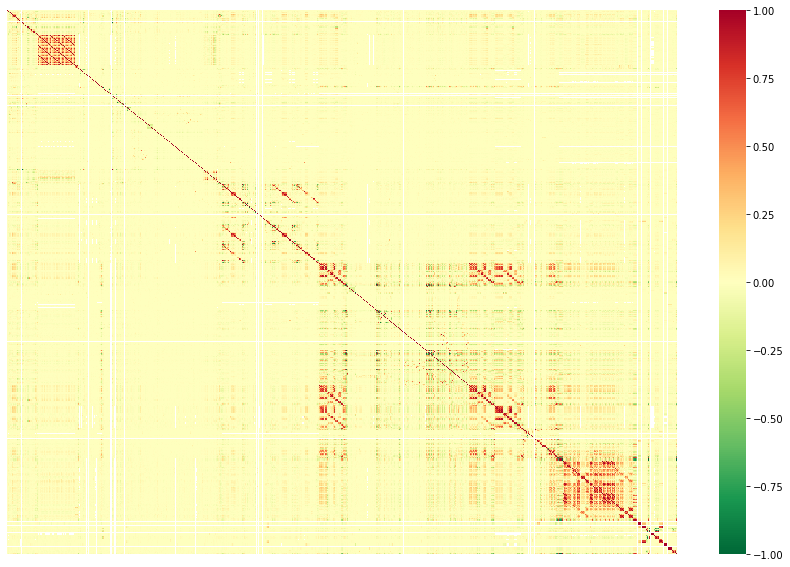

In [6]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(app.df.sample(frac=0.1).corr(method='pearson'), cmap='RdYlGn_r', xticklabels=False, yticklabels=False)

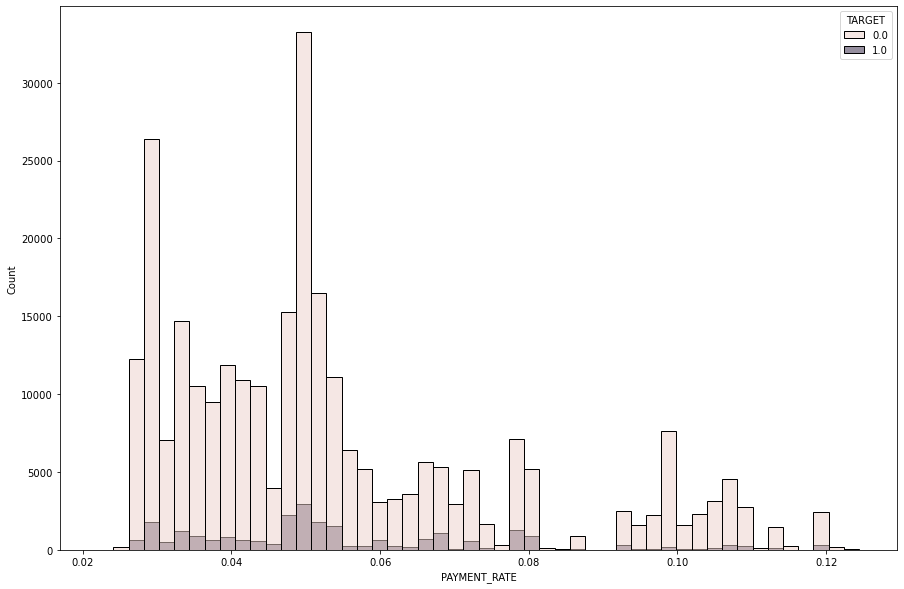

In [7]:
plt.figure(figsize=(15,10))
ax = sns.histplot(data=app.df, x="PAYMENT_RATE", hue="TARGET", bins=50)

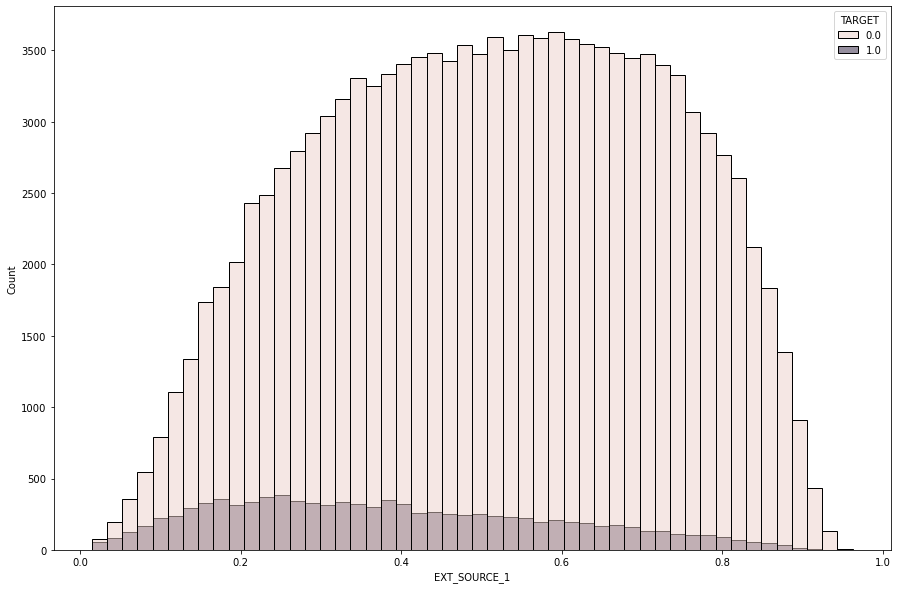

In [8]:
plt.figure(figsize=(15,10))
ax = sns.histplot(data=app.df, x="EXT_SOURCE_1", hue="TARGET", bins=50)

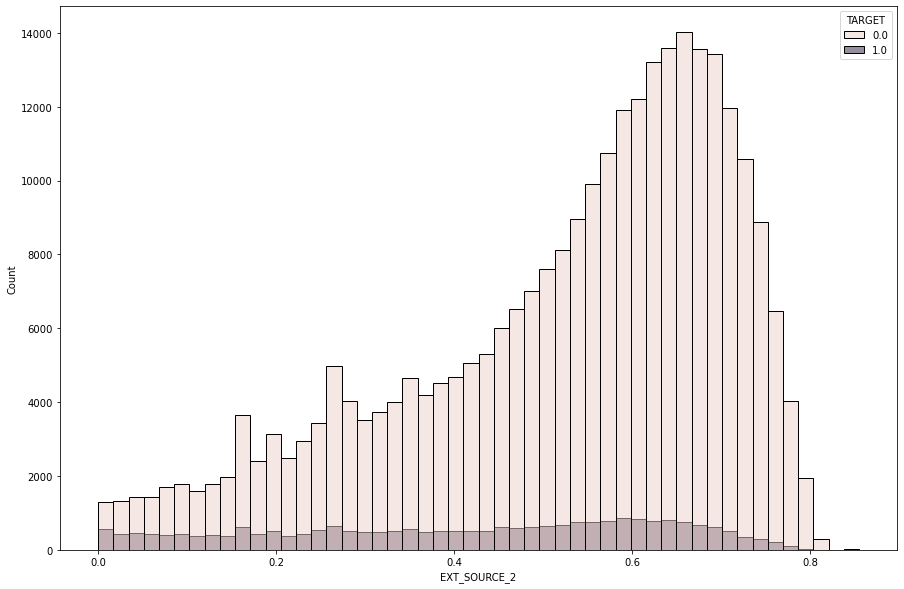

In [9]:
plt.figure(figsize=(15,10))
ax = sns.histplot(data=app.df, x="EXT_SOURCE_2", hue="TARGET", bins=50)

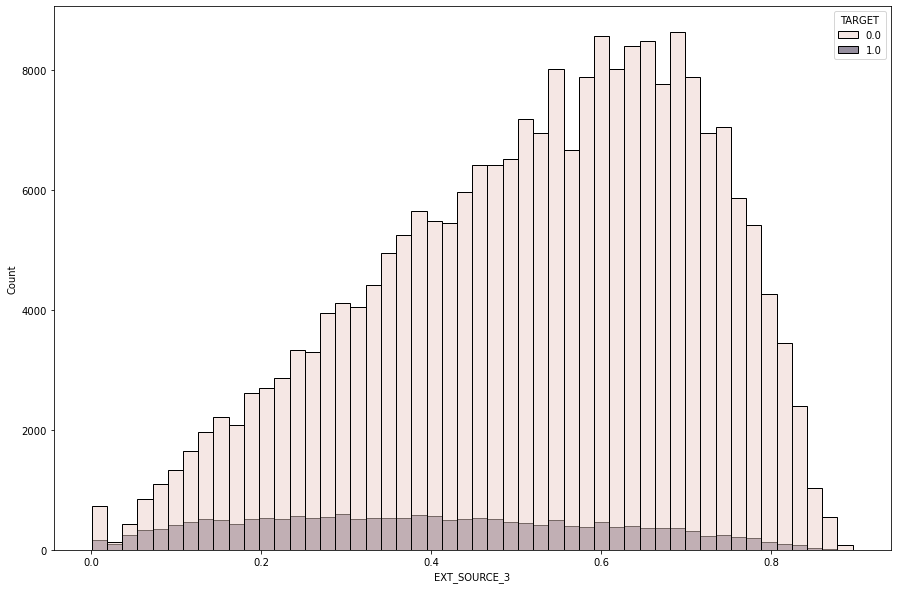

In [10]:
plt.figure(figsize=(15,10))
ax = sns.histplot(data=app.df, x="EXT_SOURCE_3", hue="TARGET", bins=50)

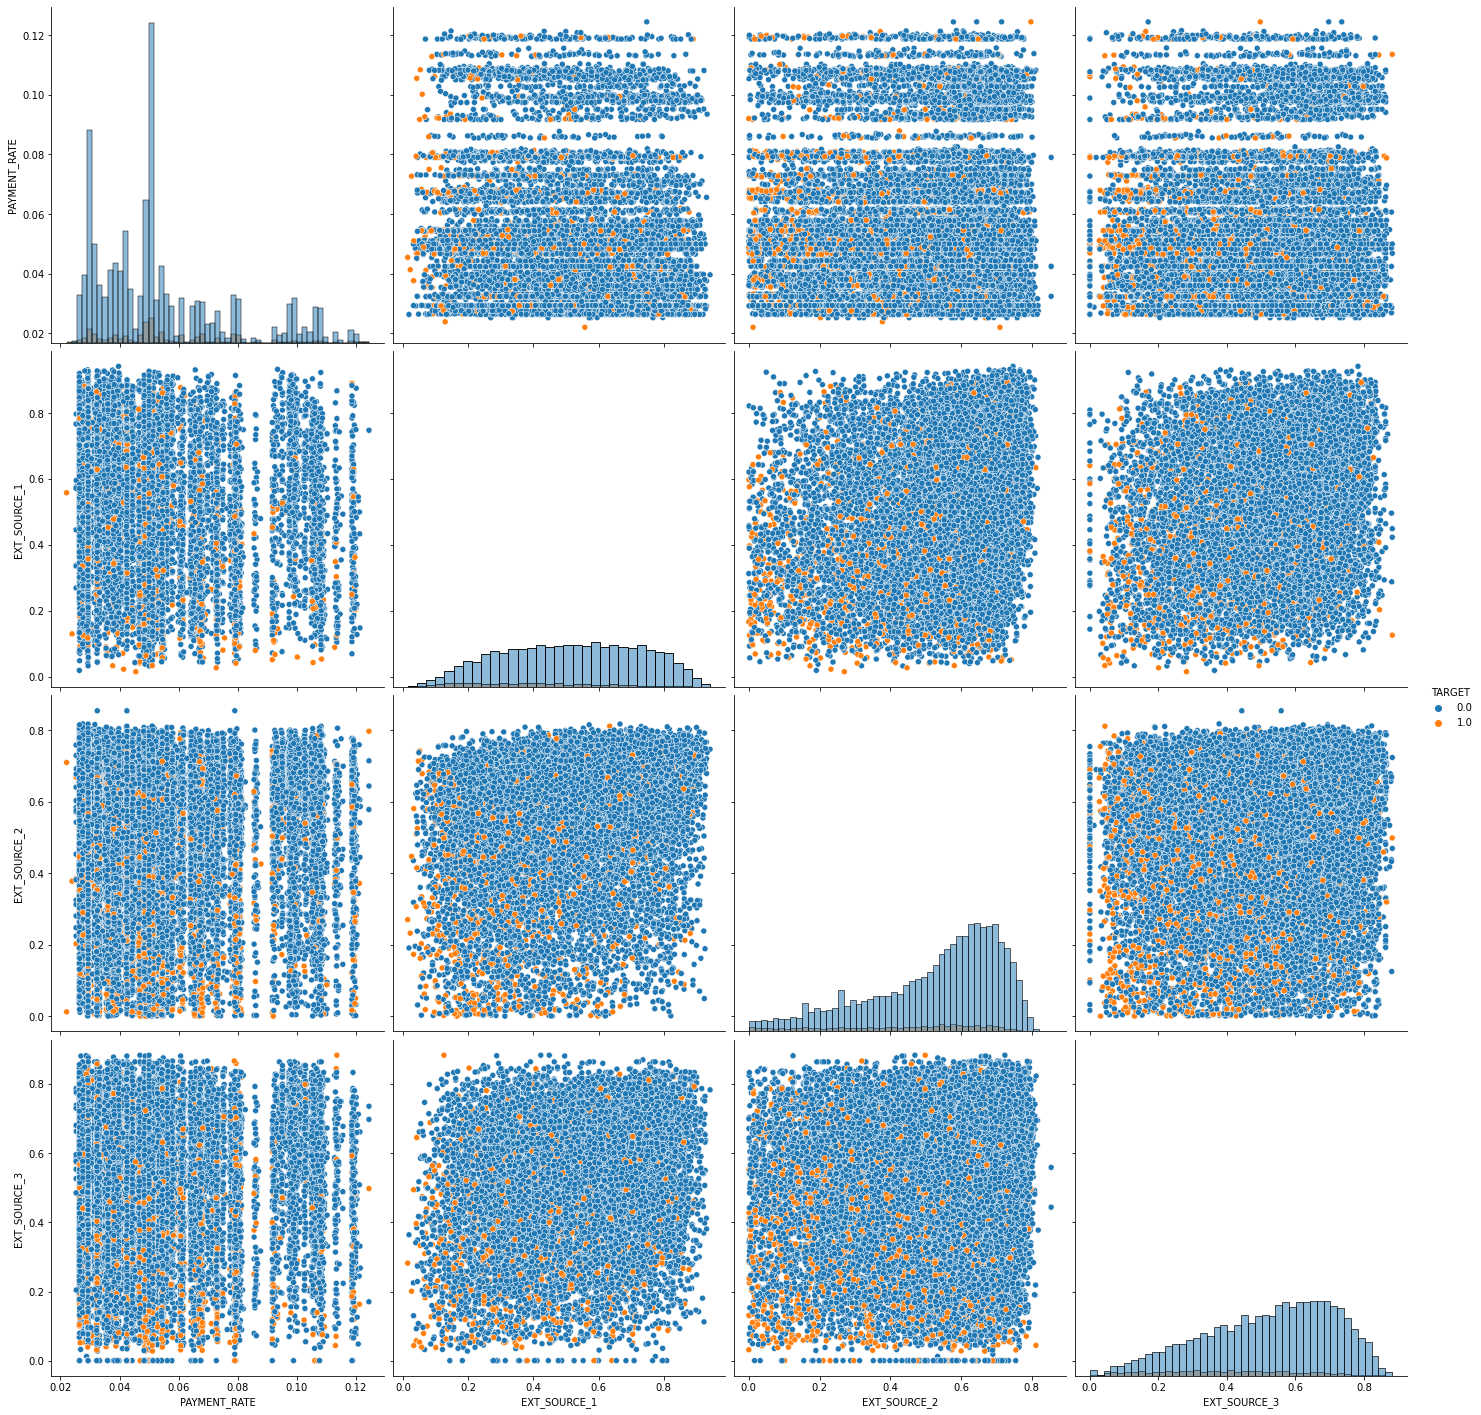

In [11]:
columns = ['TARGET', 'PAYMENT_RATE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
sns.pairplot(app.df[columns].sample(frac=0.1), hue='TARGET', diag_kind='hist', palette='tab10', height=5)

In [13]:
filename = 'Home_Credit_Default_Risk.csv'
app.clean()
app.cleaned_df.shape
app.save(filename)

Clean data...
Nombre de colonnes: 771
Le pourcentage moyen de valeurs manquantes est de 25.55%
Nombre de colonnes avec un taux de remplissage minimum de 90.00%: 424
Drop empty columns
Replace infinite value by NAN
Save data...


<AxesSubplot:>

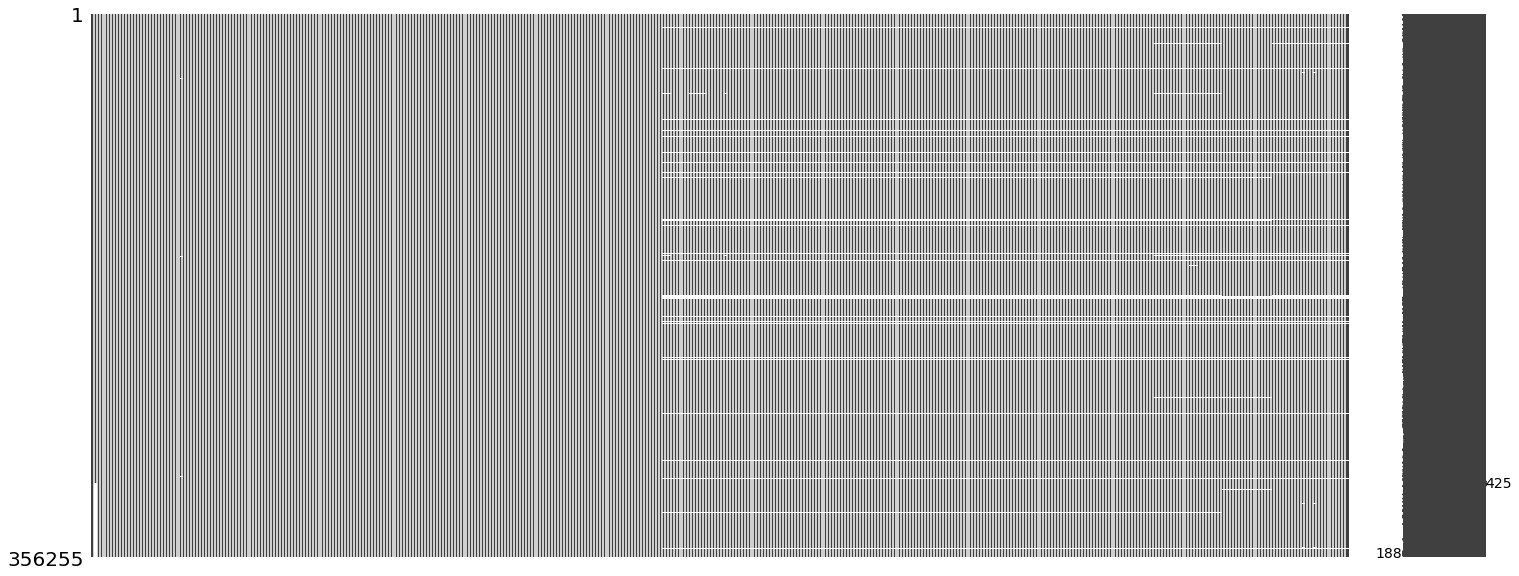

In [14]:
msno.matrix(app.cleaned_df)

### Export du notebook en HTML

In [15]:
!jupyter nbconvert --config nbconvert/config_html.py

[NbConvertApp] Converting notebook P7_01_notebookexploration.ipynb to html
[NbConvertApp] Writing 4623390 bytes to P7_01_notebookexploration.html
[NbConvertApp] Converting notebook P7_02_notebookscoring.ipynb to html
[NbConvertApp] Writing 4455319 bytes to P7_02_notebookscoring.html
[NbConvertApp] Converting notebook P7_03_notebookdashboard.ipynb to html
C:\Users\flori\miniconda3\envs\jupyter\lib\site-packages\nbconvert\filters\datatypefilter.py:39: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.
  warn("Your element with mimetype(s) {mimetypes}"
[NbConvertApp] Writing 901023 bytes to P7_03_notebookdashboard.html
